# Leistungsnachweis – Analyse das ersten Datensatzes
# Psychische Erkrankungen und Krankheitslast (DALYs) in verschiedenen Weltregionen (1990–2021)
Psychische Erkrankungen stellen weltweit eine bedeutende gesundheitliche Herausforderung dar. Diese Arbeit analysiert Daten der Global Burden of Disease Study 2023, die Informationen zu psychischen Erkrankungen in verschiedenen Weltregionen für den Zeitraum von 1990 bis 2021 enthalten. Ziel ist es, zeitliche Entwicklungen sowie Unterschiede zwischen Regionen, Altersgruppen und Erkrankungsarten darzustellen.

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Analyse der Krankheitslast psychischer Erkrankungen anhand von DALYs (1990–2021)
### 1.2 Fragestellung:
- Wie hat sich die DALY-Rate psychischer Erkrankungen von 1990 bis 2021 in den verschiedenen Weltregionen entwickelt?
- Welche Unterschiede in der DALY-Rate psychischer Erkrankungen bestehen zwischen Männern und Frauen?
- Wie unterscheidet sich die DALY-Rate psychischer Erkrankungen zwischen verschiedenen Altersgruppen in unterschiedlichen Weltregionen?  
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org/burden-of-disease

- https://ourworldindata.org/burden-of-disease#the-burden-from-non-communicable-diseases-by-sub-category

- https://vizhub.healthdata.org/gbd-results/



### 1.4 Daten beschaffen und laden

In [1]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv("newdaten.csv")

# Erste Übersicht über den Datensatz
df.head()

# Bedeutung der Variablen / Spalten:

# measure_id:   ID der Messgröße
# measure_name: Name der Messgröße (z.B. "DALYs (Disability-Adjusted Life Years)")

# location_id:   ID der Region
# location_name: Name der Region (z.B. Western Europe, Sub-Saharan Africa, ...)

# sex_id:   ID des Geschlechts
# sex_name: Geschlecht (Male / Female)

# age_id:   ID der Altersgruppe
# age_name: Altersgruppe (z.B. "<20 years", "25+ years", "<70 years")

# cause_id:   ID der Erkrankung / Ursache
# cause_name: Art der psychischen Erkrankung (z.B. Anxiety disorders, Depressive disorders, ...)

# metric_id:   ID der Messart
# metric_name: Messart (Number = absolute Anzahl, Rate = Rate pro Bevölkerung, Percent = Anteil in %)

# year: Jahr der Erhebung (1990–2021)

# val:   geschätzter Wert für die jeweilige Kombination (je nach metric_name: Number/Rate/Percent)
# lower: untere Schätzgrenze (Unsicherheitsintervall)
# upper: obere Schätzgrenze (Unsicherheitsintervall)


,smeasure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,1,Male,157,25+ years,558,Mental disorders,1,Number,1991,255409.824795,321820.358219,184580.313464
1,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,2,Female,157,25+ years,558,Mental disorders,1,Number,1991,311258.672585,403065.197676,221914.920668
2,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,1,Male,157,25+ years,558,Mental disorders,2,Percent,1991,0.031173,0.038217,0.024175
3,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,2,Female,157,25+ years,558,Mental disorders,2,Percent,1991,0.043357,0.053393,0.034210
4,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,1,Male,157,25+ years,558,Mental disorders,3,Rate,1991,1675.730017,2111.445927,1211.021432


## 2. Daten vorbereiten 
Der Datensatz liegt im Long-Format vor, wobei jede Zeile eine Kombination aus Jahr, Region, Geschlecht, Altersgruppe, Erkrankung und Messwert darstellt. Für übersichtliche Vergleiche über die Zeit werden die Daten gezielt in einfache Pivot-Tabellen (Wide-Format) umgewandelt, z. B. für Altersgruppen, Regionen oder Geschlecht im Verlauf der Jahre. Der Datensatz enthält sowohl kategoriale Variablen (Region, Geschlecht, Alter, Erkrankung) als auch numerische Variablen (Jahr und DALY-Werte).

In [28]:
table_age_year = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
].pivot_table(
    index="age_name",
    columns="year",
    values="val",
    aggfunc="mean"
).sort_index(axis=1)

table_age_year



C:\Users\User\AppData\Local\Temp\ipykernel_22320\2312807392.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
age_name,,,,,,,,,,,,,,,,,,,,,
25+ years,400.812335,402.403329,402.638994,402.823096,405.356618,403.391646,405.294470,404.808012,405.251845,406.686074,...,414.742147,414.742252,416.991552,417.276726,418.562262,420.402399,421.181572,422.194656,462.320628,464.120530
<20 years,227.825672,227.823129,227.132272,227.427322,229.652228,230.030592,233.010593,234.532105,237.216238,240.185035,...,263.724400,265.233218,268.977350,271.049986,274.002988,277.330684,280.117868,283.292724,326.007036,329.829996
<70 years,344.249413,345.931728,346.287566,347.002737,349.846088,349.035597,351.767097,352.280707,354.071488,356.525996,...,377.206438,378.230692,381.719005,383.147965,385.545370,388.659573,390.630213,393.096710,435.465676,438.420867


In [29]:
table_region_year = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
].pivot_table(
    index="location_name",
    columns="year",
    values="val",
    aggfunc="mean"
).sort_index(axis=1)

table_region_year


C:\Users\User\AppData\Local\Temp\ipykernel_22320\3728265724.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
location_name,,,,,,,,,,,,,,,,,,,,,
Australasia,388.104557,388.995308,389.004431,388.278349,394.686283,389.735410,397.229391,395.966098,399.770359,403.511567,...,453.769999,453.948568,463.915618,464.937519,469.860806,478.518835,481.736170,487.571320,518.430502,522.310775
Central Asia,240.197052,241.257524,243.413670,245.177814,246.533197,247.017990,247.996332,248.763709,248.640152,252.655454,...,260.086365,259.196925,258.757572,257.840445,255.684052,256.211827,256.954981,255.659655,281.908765,284.317823
High-income North America,372.334710,375.766478,373.428932,376.163744,377.991397,379.144055,382.512256,383.127088,386.351780,388.449262,...,388.472658,387.306020,387.564008,386.684187,386.817959,385.767090,384.972136,385.214541,434.064301,433.674554
Sub-Saharan Africa,268.373177,269.008104,270.231324,269.635000,272.152762,271.394312,273.118724,274.894076,275.667441,277.228883,...,285.244795,287.698239,290.284634,293.260176,296.969938,299.765787,301.989504,304.511501,350.499830,356.590179
Western Europe,352.469536,351.902895,350.686363,349.500350,350.061251,350.137959,349.263563,349.950403,350.469552,350.483342,...,371.881157,375.527183,378.958015,383.068802,387.518278,390.390889,394.229965,398.016469,454.752167,457.058989


In [30]:
table_sex_year = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
].pivot_table(
    index="sex_name",
    columns="year",
    values="val",
    aggfunc="mean"
).sort_index(axis=1)

table_sex_year


C:\Users\User\AppData\Local\Temp\ipykernel_22320\3531598804.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
sex_name,,,,,,,,,,,,,,,,,,,,,
Female,340.480129,341.762221,341.673125,342.191103,345.163433,344.315343,347.232757,347.869855,349.802362,352.564025,...,370.953842,371.810835,375.275080,376.840897,379.485461,382.357357,384.499814,386.970942,437.184353,440.396155
Male,308.111484,309.009902,309.032763,309.311000,311.406523,310.656547,312.815350,313.210694,314.557351,316.367378,...,332.828147,333.659939,336.516859,337.475554,339.254952,341.904414,343.453288,345.418452,378.677873,381.184773


In [31]:
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
]

top_causes = (
    df_base.groupby("cause_name")["val"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

table_cause_year = df_base[df_base["cause_name"].isin(top_causes)].pivot_table(
    index="cause_name",
    columns="year",
    values="val",
    aggfunc="mean"
).sort_index(axis=1)

table_cause_year


C:\Users\User\AppData\Local\Temp\ipykernel_22320\2352160885.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_base.groupby("cause_name")["val"]
C:\Users\User\AppData\Local\Temp\ipykernel_22320\2352160885.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table_cause_year = df_base[df_base["cause_name"].isin(top_causes)].pivot_table(


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
cause_name,,,,,,,,,,,,,,,,,,,,,
Anxiety disorders,469.036562,470.189472,471.735320,474.434840,478.545127,483.140826,487.738533,492.222533,497.009593,502.233481,...,534.576499,540.832204,550.508590,559.106119,569.110271,578.144165,586.605248,596.405856,715.700128,728.647419
Attention-deficit/hyperactivity disorder,57.209903,57.413224,57.595242,57.748763,57.926256,58.087824,58.202277,58.291714,58.351182,58.402273,...,58.196906,58.380513,58.527992,58.573214,58.529044,58.500802,58.499520,58.506550,58.508238,58.569309
Autism spectrum disorders,139.309661,139.560228,139.833698,140.169167,140.534906,140.909889,141.398765,141.908335,142.457544,143.112825,...,156.109470,157.428152,158.596791,159.732469,160.815970,162.029838,163.249402,164.419870,165.256805,166.249803
Bipolar disorder,116.280373,115.960968,115.800550,115.628010,115.599286,115.647276,115.771203,115.873589,116.100019,116.308449,...,115.847968,115.682662,115.504840,115.362926,115.270748,115.227236,115.117894,115.161171,114.794637,114.464203
Conduct disorder,87.829375,87.677477,87.530186,87.673620,87.875705,88.208982,88.552414,89.022159,89.528895,89.917270,...,86.034117,86.146067,86.173053,86.187467,86.182964,86.380538,86.651762,87.021336,87.395650,87.751423
Depressive disorders,509.269224,514.081275,512.059624,511.020248,519.783156,509.361070,516.716053,512.279238,513.385414,517.898381,...,565.456495,562.594469,569.538451,567.138641,568.486846,573.596827,574.330906,575.173880,685.470470,689.262888
Eating disorders,70.555740,70.460956,70.288564,70.175622,70.124419,70.102945,70.190625,70.406240,70.657849,70.947349,...,76.461581,76.555289,76.619163,76.616970,76.591539,76.575510,76.463296,76.541514,76.508247,76.737664
Mental disorders,1783.626936,1789.623340,1789.441192,1791.630784,1805.567379,1801.172698,1815.132294,1817.971511,1826.989213,1839.561359,...,1935.400471,1940.044629,1957.427831,1964.370242,1976.536137,1991.719870,2001.871031,2014.070833,2243.621122,2259.347553
Other mental disorders,107.862161,107.943276,108.049321,108.233191,108.402665,108.601709,108.750343,109.004258,109.159578,109.296802,...,111.246430,111.361609,111.399677,111.454114,111.524458,111.564487,111.687582,111.738585,111.688784,111.658097


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

Die zentrale untersuchte Variable ist der DALY-Wert (val), welcher kontinuierlich ist. Zusätzlich enthält der Datensatz mehrere diskrete, kategoriale Variablen wie Region, Geschlecht, Altersgruppe, Erkrankung und Messart. Für diese Kategorien wird untersucht, wie viele unterschiedliche Klassen existieren und wie viele Datenpunkte pro Klasse vorhanden sind. Außerdem wird geprüft, ob fehlende Werte auftreten und wie die Verteilung der DALY-Werte aussieht. Diese deskriptive Analyse dient dazu, einen ersten Überblick über Struktur, Umfang und Eigenschaften der Rohdaten zu erhalten.

In [34]:
df.dtypes


smeasure_id         Int64
measure_name     category
location_id         Int64
location_name    category
sex_id              Int64
sex_name         category
age_id              Int64
age_name         category
cause_id            Int64
cause_name       category
metric_id           Int64
metric_name      category
year                Int64
val               float64
upper             float64
lower             float64
dtype: object

In [35]:
len(df)


31680

In [36]:
table_overview = pd.DataFrame({
    "Anzahl gültiger Werte": df.count(),
    "Anzahl fehlender Werte": df.isna().sum()
})

table_overview


,Anzahl gültiger Werte,Anzahl fehlender Werte
smeasure_id,31680,0
measure_name,31680,0
location_id,31680,0
location_name,31680,0
sex_id,31680,0
sex_name,31680,0
age_id,31680,0
age_name,31680,0
cause_id,31680,0
cause_name,31680,0


C:\Users\User\AppData\Local\Temp\ipykernel_22320\1795839001.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_base.groupby("cause_name")["val"]
C:\Users\User\AppData\Local\Temp\ipykernel_22320\1795839001.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cause_year = df_plot.pivot_table(


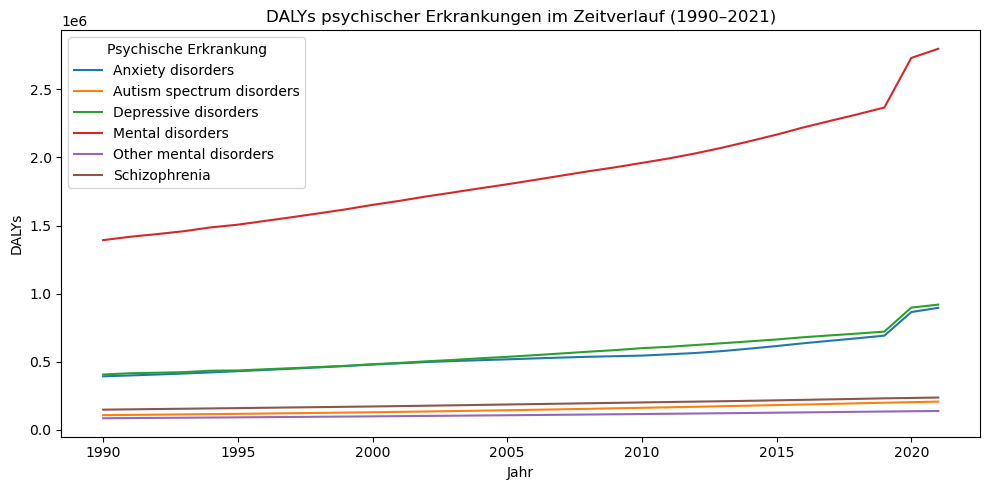

In [44]:
import matplotlib.pyplot as plt

# Basis: DALYs als absolute Anzahl
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Number")
]

# Optional: nur die wichtigsten Erkrankungen (Top 6), damit es übersichtlich bleibt
top_causes = (
    df_base.groupby("cause_name")["val"]
    .mean()
    .sort_values(ascending=False)
    .head(6)
    .index
)

df_plot = df_base[df_base["cause_name"].isin(top_causes)]

# Pivot: Jahre × Erkrankungen
cause_year = df_plot.pivot_table(
    index="year",
    columns="cause_name",
    values="val",
    aggfunc="mean"
).sort_index()

# Linienplot
plt.figure(figsize=(10, 5))
for cause in cause_year.columns:
    plt.plot(cause_year.index, cause_year[cause], label=cause)

plt.xlabel("Jahr")
plt.ylabel("DALYs")
plt.title("DALYs psychischer Erkrankungen im Zeitverlauf (1990–2021)")
plt.legend(title="Psychische Erkrankung")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22320\4060707926.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_base.pivot_table(


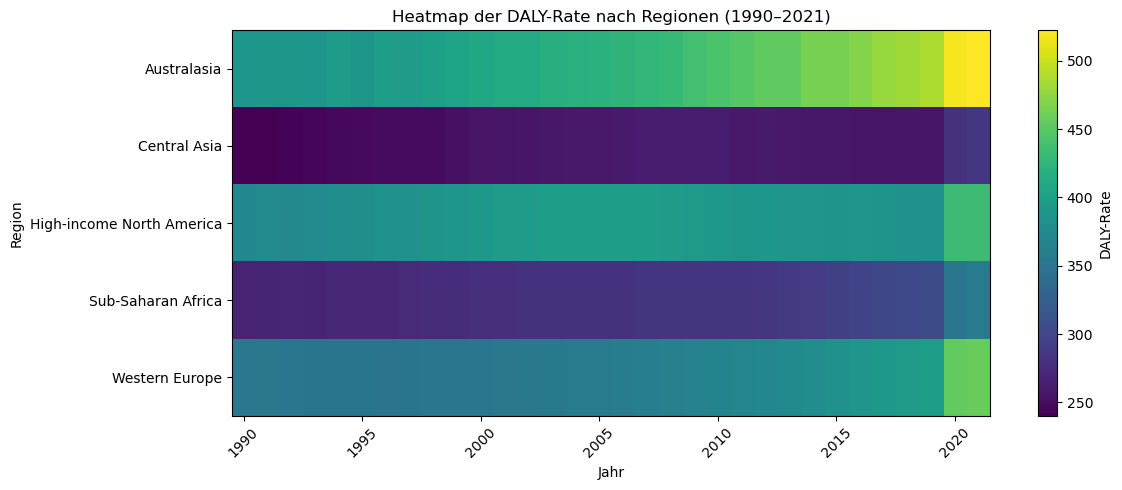

In [37]:
import matplotlib.pyplot as plt

# Basis: DALYs und Rate
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
]

# Pivot-Tabelle: Regionen (Zeilen) × Jahre (Spalten)
heatmap_data = df_base.pivot_table(
    index="location_name",
    columns="year",
    values="val",
    aggfunc="mean"
).sort_index(axis=1)

# Heatmap plotten
plt.figure(figsize=(12, 5))
plt.imshow(heatmap_data, aspect="auto")
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.xticks(range(0, len(heatmap_data.columns), 5),
           heatmap_data.columns[::5],
           rotation=45)
plt.colorbar(label="DALY-Rate")
plt.title("Heatmap der DALY-Rate nach Regionen (1990–2021)")
plt.xlabel("Jahr")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22320\2248528087.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_mean = df_base.groupby("age_name")["val"].mean()


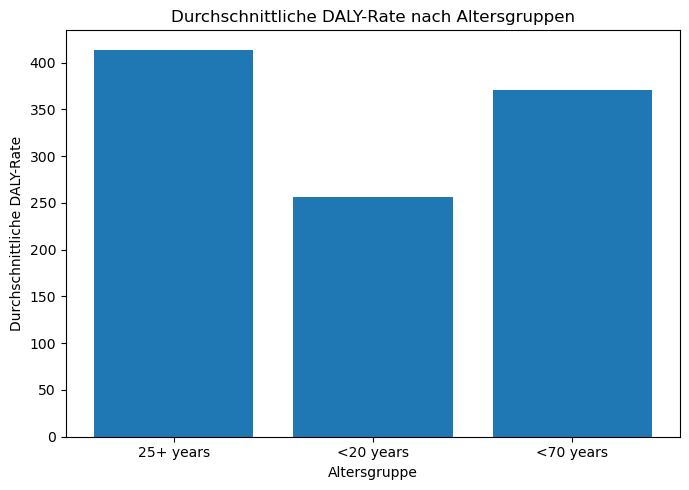

In [42]:
import matplotlib.pyplot as plt

# Basis: DALYs und Rate
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
]

# Durchschnittliche DALY-Rate pro Altersgruppe (über alle Jahre)
age_mean = df_base.groupby("age_name")["val"].mean()

# Säulendiagramm
plt.figure(figsize=(7, 5))
plt.bar(age_mean.index, age_mean.values)
plt.xlabel("Altersgruppe")
plt.ylabel("Durchschnittliche DALY-Rate")
plt.title("Durchschnittliche DALY-Rate nach Altersgruppen")
plt.tight_layout()
plt.show()




C:\Users\User\AppData\Local\Temp\ipykernel_22320\391844247.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sex_year = df_base.pivot_table(


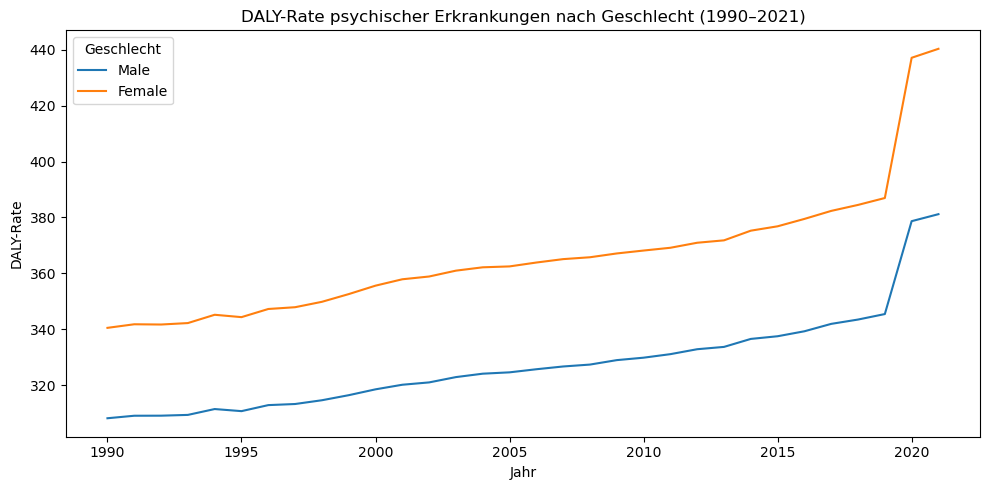

In [47]:
import matplotlib.pyplot as plt

# Basis: DALYs und Rate
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
]

# Pivot-Tabelle: Jahre × Geschlecht
sex_year = df_base.pivot_table(
    index="year",
    columns="sex_name",
    values="val",
    aggfunc="mean"
).sort_index()

# Liniendiagramm
plt.figure(figsize=(10, 5))
plt.plot(sex_year.index, sex_year["Male"], label="Male")
plt.plot(sex_year.index, sex_year["Female"], label="Female")

plt.xlabel("Jahr")
plt.ylabel("DALY-Rate")
plt.title("DALY-Rate psychischer Erkrankungen nach Geschlecht (1990–2021)")
plt.legend(title="Geschlecht")
plt.tight_layout()
plt.show()


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

